# 一般化線形モデル (GLM) 2

__二項分布__ = 
- カウントデータ
- 0 $\leq$ x $\leq$ N

こういう時は __ロジスティック回帰__　．
例えばコイン．

## 今日の例題: N 個の胚珠のうち y 個が結実

$y \in [0,8]$,
結実確率 : $q$,
100個体で50個は何もしてなくて，残りは肥料．

>そしてこの例題で調べたいことは「ある個体の結実確率 qi がサイズ xi や 施肥処理によってどう変わるのか (あるいは変わらないのか)，それを統計モ デルを使ったデータ解析，つまりパラメーター推定やモデル選択で明らかに していこう，というものです

In [1]:
 d <- read.csv("data4a.csv")

In [2]:
head(d)

N,y,x,f
8,1,9.76,C
8,6,10.48,C
8,5,10.83,C
8,6,10.94,C
8,1,9.37,C
8,1,8.81,C


In [3]:
summary(d)

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

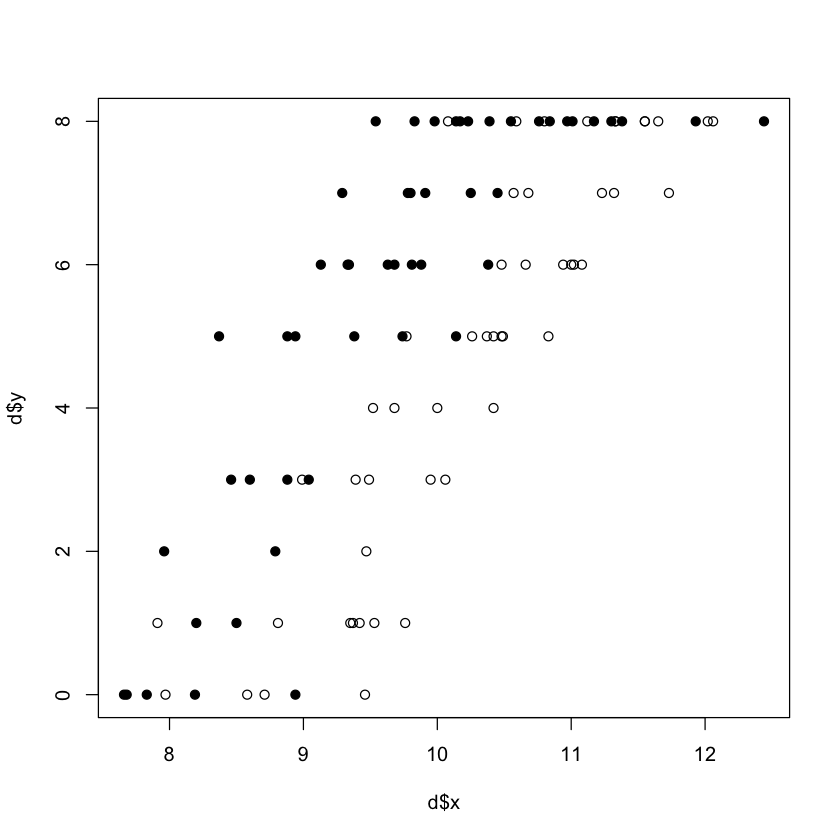

In [6]:
plot(d$x, d$y, pch = c(21, 19)[d$f])

- サイズ xi が大きくなると結実種子数 yi が多くなるらしい
- 肥料をやると (fi = T) 結実種子数 yi が多くなるらしい

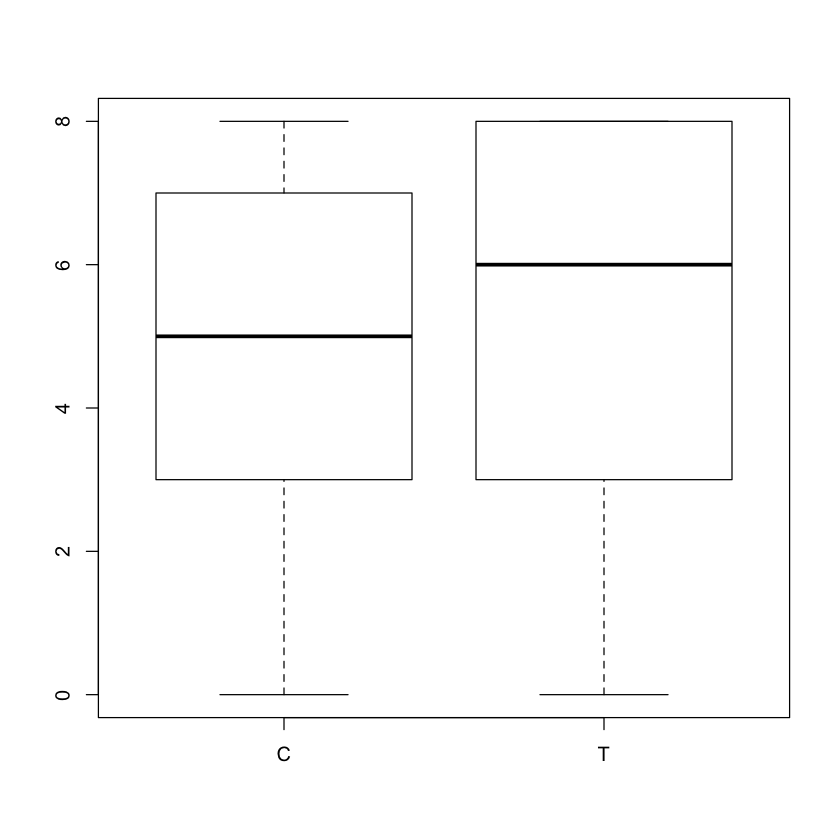

In [5]:
plot(d$f, d$y)

- サイズを考慮した方が，肥料の影響が見える．

## 二項分布のロジスティックモデルとは何か?

二項分布

$p(y \mid N, q) =
\begin{pmatrix}
    N \\
    y
\end{pmatrix}
q^y(1-q)^{N-y}
$

In [8]:
N <- 8
y <- 0:N

二項分布の例

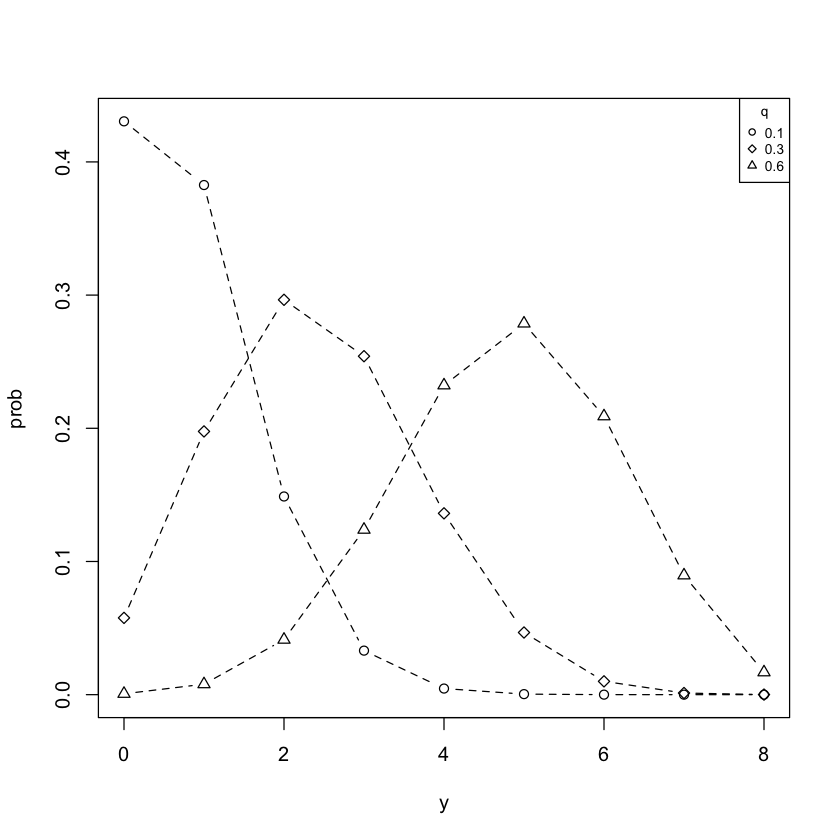

In [10]:
plot(y, dbinom(y, N, prob = 0.1), type = "b", lty = 2, pch = 21, ylab = "prob")
lines(y, dbinom(y, N, prob = 0.3), type = "b", lty = 2, pch = 23)
lines(y, dbinom(y, N, prob = 0.6), type = "b", lty = 2, pch = 24)
legend("topright", legend = c(0.1, 0.3, 0.6), pch = c(21, 23, 24), title = "q", cex = 0.7)

結実確率$q_i$を何で表す？
二項分布ならシグモイド関数．logit link関数．
線形予測子$z$とすると
\begin{align}
    q = \frac{1}{1 + \exp(-z)}
\end{align}
で定義される．

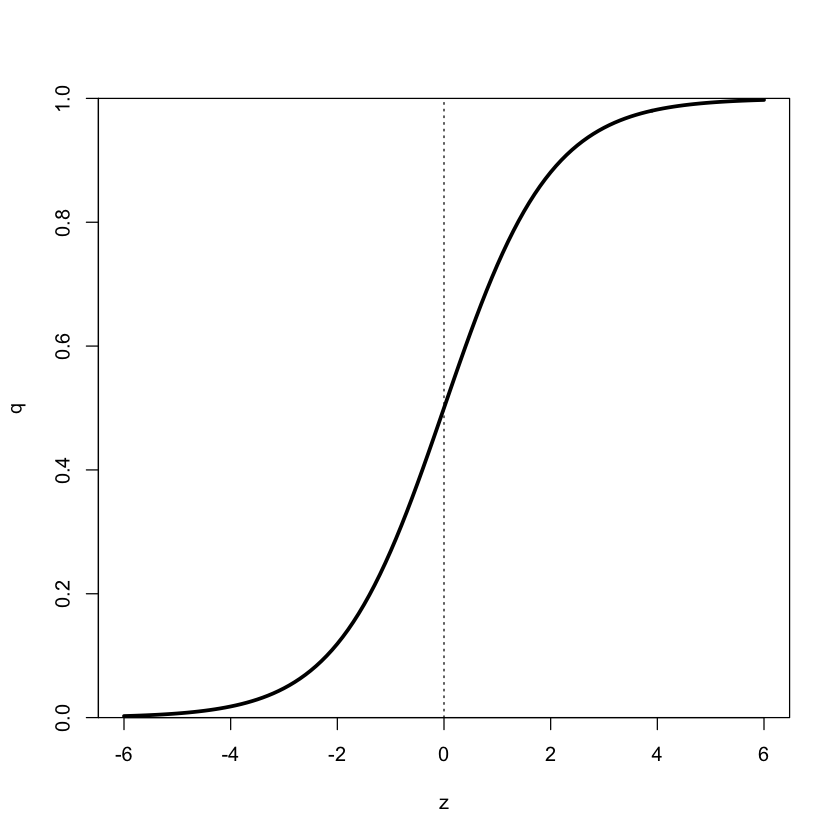

In [11]:
logistic <- function(z) 1 / (1 + exp(-z))
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type = "l", lwd = 3,　ylim = c(0, 1), yaxs = "i", ylab = "q")
abline(v = 0, lty = 3)

$z = \beta_1 + \beta_2 x$とする．

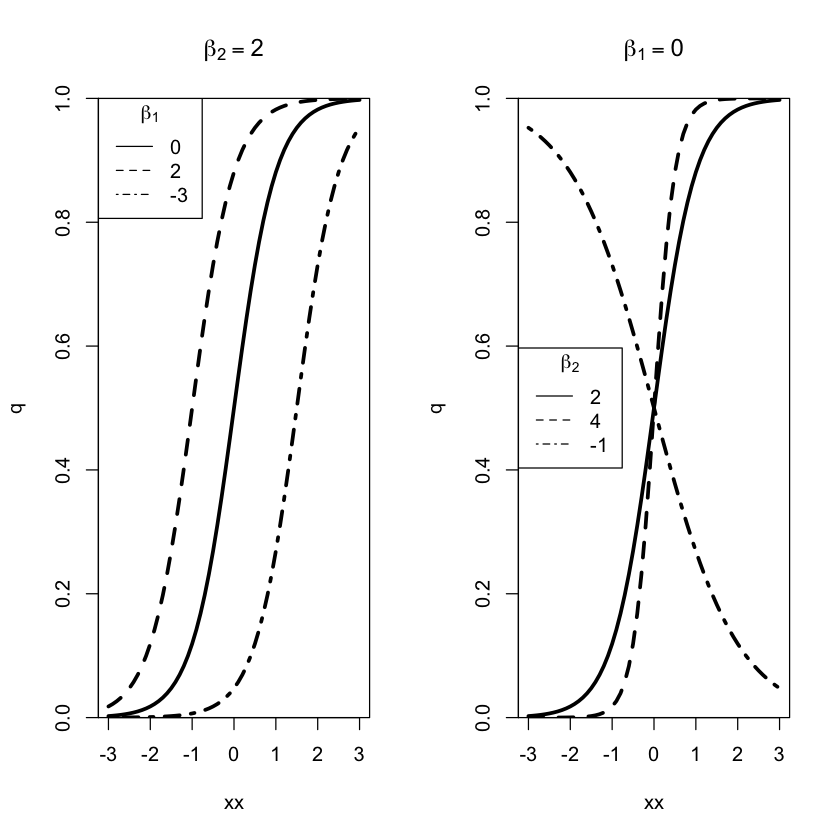

In [13]:
par(mfrow = c(1, 2))
xx <- seq(-3, 3, 0.1)
plot(xx, logistic(0 + 2 * xx), type = "l", lwd = 3, ylim = c(0, 1), yaxs = "i", ylab = "q",　main = expression(beta[2]==2))
lines(xx, logistic(2 + 2 * xx), lwd = 3, lty = 2)
lines(xx, logistic(-3 + 2 * xx), lwd = 3, lty = 4)
legend("topleft", legend = c(0, 2, -3), lty = c(1, 2, 4),　title = expression(beta[1]))
plot(xx, logistic(0 + 2 * xx), type = "l", lwd = 3,　ylim = c(0, 1), yaxs = "i", ylab = "q",　main = expression(beta[1]==0))
lines(xx, logistic(0 + 4 * xx), lwd = 3, lty = 2)
lines(xx, logistic(0 - 1 * xx), lwd = 3, lty = 4)
legend("left", legend = c(2, 4, -1), lty = c(1, 2, 4), title = expression(beta[2]))

## ロジスティック回帰: glm(..., family = binomial)

In [14]:
fit.xf <- glm(cbind(y, N - y) ~ x + f, data = d, family = binomial) # cbind(結実した胚珠数, 結実しなかった胚珠数)

In [15]:
cbind (y,N-y)

y,
0,8
1,7
2,6
3,5
4,4
5,3
6,2
7,1
8,0


In [16]:
fit.xf


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

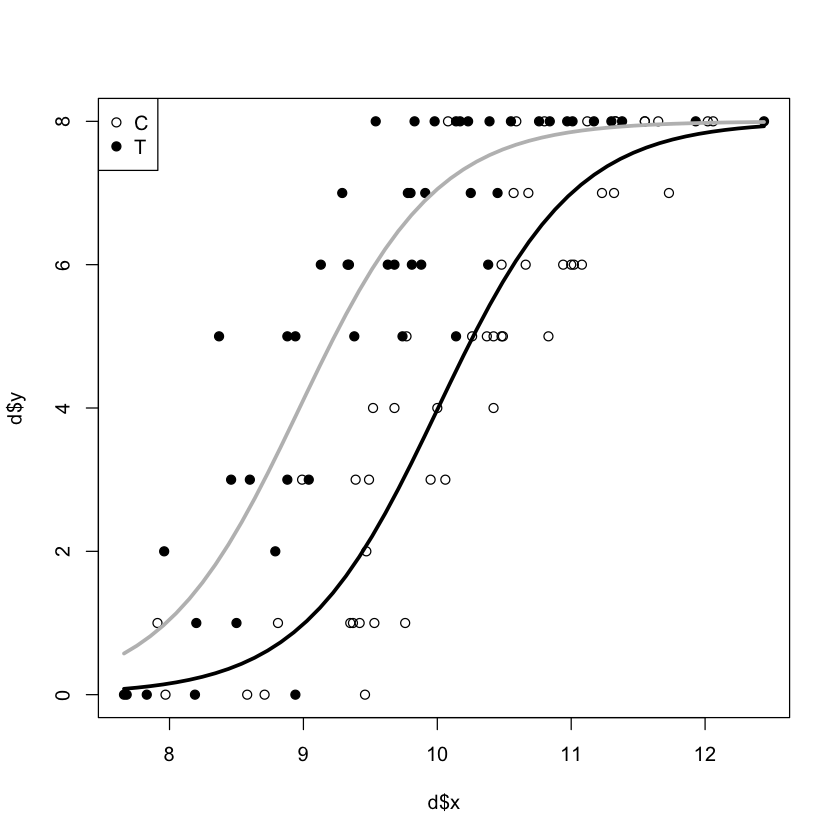

In [18]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 50)
ff <- factor("C", levels = c("C", "T"))
q <- predict(fit.xf, newdata = data.frame(x = xx, f = ff), type = "response")
lines(xx, q * 8, lwd = 3)
ff <- factor("T", levels = c("C", "T"))
q <- predict(fit.xf, newdata = data.frame(x = xx, f = ff), type = "response")
lines(xx, q * 8, col = "gray", lwd = 3)
legend("topleft", legend = c("C", "T"), pch = c(21, 19))

## リンク関数 "logit" の意味・解釈

ロジスティック関数を変形して，
\begin{align}
    \frac{q_i}{1-q_i} = \exp(\beta_1)\exp(\beta_2x_i\exp(\beta_3f_i))
\end{align}
を得る．左辺はオッズ．
これを利用して，logit関数を定義する．
\begin{align}
    logit(q_i) = \log\frac{q_i}{1-q_i} = \beta_1 + \beta_2x_i + \beta_3f_i
\end{align}
logistic関数の逆関数．

## ロジスティックモデルのモデル選択

In [20]:
fit.xf <- glm(cbind(y, N - y) ~ x + f, data = d, family = binomial) # cbind(結実した胚珠数, 結実しなかった胚珠数)
fit.xf


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

In [21]:
library(MASS)
stepAIC(fit.xf) # 「x + f モデル」を使う

Start:  AIC=272.21
cbind(y, N - y) ~ x + f

       Df Deviance    AIC
<none>      123.03 272.21
- f     1   217.17 364.35
- x     1   490.58 637.76



Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

- ACIの観点からはx+fが一番いい．

## 本日のお作法: 何でも割算するな!

>今回の GLM 紹介で述べたかったことは，Y = (観測データ) / (観測データ) みたいな割り算値を使った解析をするな，ということです.理由はいろいろ ありますが，たとえば分母にも分子にも誤差が入ってる値を割って作った Y はどんな確率分布にしたがうんだ? ふたつの値をそういう方法でひとつの値 にしてよい根拠は何? などなどです.

>そもそも，統計モデリングで (観測データ) / (観測データ) という数量を 作りだして，それを何かの統計モデルにあてはめる，とういことはほとんど ありえない，と断定してよいかと思います.

何んでも等分散正規分布にして線形回帰は明らかに筋が悪い．確率1超えたりするし．


## 本日のわざ: offset 項わざで割算回避

>カウントデータの解析に割り算値はいらない，の補足のために前回あつ かったポアソンモデルの「offset 項わざ」について説明してみます.たとえ ばこんな架空データがあったとします.

- 森林のあちこちに調査地 100 箇所を設定した (i ∈ {1, 2, · · · , 100})
- 調査地の面積 ai はふぞろいである
- また調査地の「明るさ」 xi を測っている
- 調査地 i における植物個体数 yi
- (解析の目的) 調査地 i における植物個体の「密度」が「明るさ」 xi に どう影響されてるか知りたい

In [22]:
d <- read.csv("data4b.csv")

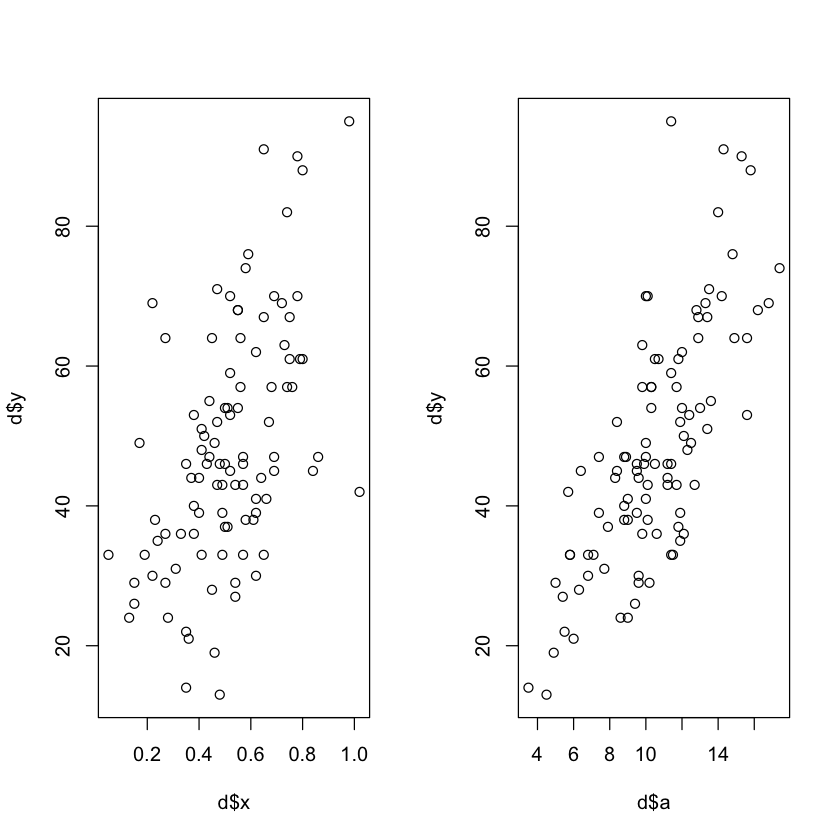

In [23]:
par(mfrow = c(1, 2))
plot(d$x, d$y)
plot(d$a, d$y)

>ここで密度の定義は個体数 / 面積，だからといって d$y / d$a みたいな割 り算値をこしらえる必要はありません.このような問題は GLM の offset 項 オプションを使って解決します

個体平均$\lambda$, 面積$a$に対し$\lambda = a \times \text{密度}$と考えているが，
- 密度は0以上
- また明るさに依存

という事実から
$\lambda = a \times \exp(\beta_1 + \beta_2x) = \exp(\beta_1 + \beta_2x + \log a)$
として良い．exp内のパラメータに依存しない$\log a$を __offset項__ という．

In [25]:
fit <- glm(y ~ x, offset = log(a), data = d, family = poisson)
fit


Call:  glm(formula = y ~ x, family = poisson, data = d, offset = log(a))

Coefficients:
(Intercept)            x  
     0.9749       1.0345  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.66 	AIC: 650.4

## GLM で統計モデリングを始めよう

GLMは正規分布も扱える．直線回帰とかANOVAとかもこれで統一的に扱える．（この立場から見た方がわかりやすい）．
分散分析は単に
```
glm(y ~ x, family = gaussian, ...)
```
に過ぎない．この後で検定でモデル選択みたいなことをしようというような．ここではACIでやるという立場．